<code>Task 8: Тепловая карта (heatmap)
    1.Анализируйте только пользователей, а не администраторов.
    2.Используйте фильтр status = 'ready' для коммитов.
    3.Разрешается выбрать цветовую палитру по своему вкусу для обоих графиков, которые вы построите в этом упражнении.
    4.Используйте таблицу checker для вашего запроса.
    5.Используйте абсолютные исходные, а не средние значения числа коммитов.
    6.Отсортируйте датафреймы по общему числу коммитов, сделанных пользователем.
    7.В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопросы (ответьте на них, глядя только на графики):
        «У какого пользователя больше всего коммитов во вторник?». Ответ: user_*.
        «У какого пользователя больше всего коммитов в четверг?». Ответ: user_*.
        «В какой будний день пользователи не любят делать много коммитов?». Ответ (в качестве примера): понедельник.
        «Какой пользователь в каком часу сделал наибольшее количество коммитов?». Ответ (в качестве примера): user_1, 15.
    8.Выполните необходимые шаги по созданию следующих двух графиков:
</code>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Коннект
con = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
#Выборка данных из таблицы checker
sql = '''
      SELECT uid, timestamp FROM checker 
      WHERE uid like "user_%"
      and status = "ready"
      '''

In [5]:
checker = pd.read_sql(sql, con, parse_dates = 'timestamp')
checker

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:45.549397
2,user_4,2020-04-17 05:34:24.422370
3,user_4,2020-04-17 05:43:27.773992
4,user_4,2020-04-17 05:46:32.275104
...,...,...
1681,user_19,2020-05-21 20:01:48.959966
1682,user_1,2020-05-21 20:18:54.487900
1683,user_1,2020-05-21 20:19:06.872761
1684,user_1,2020-05-21 20:22:41.877806


In [6]:
#Создадим два списка значений для часов и дней
checker['hour'] = checker['timestamp'].dt.hour
checker['weekday'] = checker['timestamp'].dt.day_name()
checker.head()

,uid,timestamp,hour,weekday
0,user_4,2020-04-17 05:19:02.744528,5,Friday
1,user_4,2020-04-17 05:22:45.549397,5,Friday
2,user_4,2020-04-17 05:34:24.422370,5,Friday
3,user_4,2020-04-17 05:43:27.773992,5,Friday
4,user_4,2020-04-17 05:46:32.275104,5,Friday


In [7]:
#Сгруппируем данные по часам и пользователям
commit = checker.groupby(['uid', 'hour'], as_index=False)\
.agg({'timestamp': 'count'})\
.pivot(index='uid', columns='hour', values='timestamp')
commit

hour,0,1,3,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
uid,,,,,,,,,,,,,,,,,,,,,
user_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,5.0,NaN,11.0,19.0,8.0,1.0,NaN
user_10,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0,...,3.0,NaN,8.0,6.0,3.0,15.0,13.0,12.0,1.0,NaN
user_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
user_12,NaN,NaN,1.0,NaN,NaN,NaN,6.0,5.0,5.0,6.0,...,4.0,1.0,2.0,6.0,1.0,2.0,NaN,2.0,NaN,NaN
user_13,NaN,NaN,NaN,NaN,1.0,10.0,6.0,5.0,4.0,2.0,...,NaN,2.0,1.0,4.0,5.0,8.0,5.0,1.0,3.0,1.0
user_14,2.0,3.0,NaN,NaN,NaN,2.0,3.0,2.0,1.0,1.0,...,1.0,13.0,6.0,20.0,14.0,12.0,13.0,17.0,11.0,6.0
user_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,3.0,3.0,7.0,1.0,NaN,NaN
user_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,NaN,NaN,NaN,2.0,11.0,6.0,4.0,NaN


In [8]:
commit['total'] = commit.sum(axis=1)

In [9]:
#Отсортируем данные
commit = commit.sort_values('total', ascending=False).drop(columns='total').transpose().fillna(0)
commit.sort_index(inplace=True)

commit

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,2.0,7.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
10,13.0,1.0,21.0,9.0,11.0,8.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Сгруппируем данные по дням недели и пользователям
weekday = checker.groupby(['uid', 'weekday'], as_index=False)\
.agg({'timestamp': 'count'})\
.pivot(index='uid', columns='weekday', values='timestamp')


In [11]:
weekday['total'] = weekday.sum(axis=1)

In [12]:
#Отсортируем данные
days_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = weekday.sort_values('total', ascending=False).drop(columns='total').transpose().fillna(0).reindex(days_week)

weekday

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,18.0,25.0,12.0,8.0,4.0,0.0,12.0,3.0,0.0,23.0,...,4.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
Tuesday,43.0,44.0,67.0,22.0,5.0,1.0,0.0,0.0,9.0,6.0,...,2.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
Wednesday,17.0,0.0,16.0,8.0,0.0,17.0,4.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
Thursday,54.0,9.0,2.0,20.0,40.0,26.0,48.0,5.0,38.0,5.0,...,10.0,7.0,8.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0
Friday,32.0,0.0,0.0,6.0,5.0,1.0,4.0,18.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,41.0,17.0,33.0,11.0,10.0,2.0,45.0,3.0,2.0,...,18.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
Sunday,24.0,13.0,7.0,23.0,26.0,35.0,16.0,4.0,1.0,5.0,...,0.0,16.0,15.0,11.0,5.0,1.0,5.0,0.0,0.0,0.0


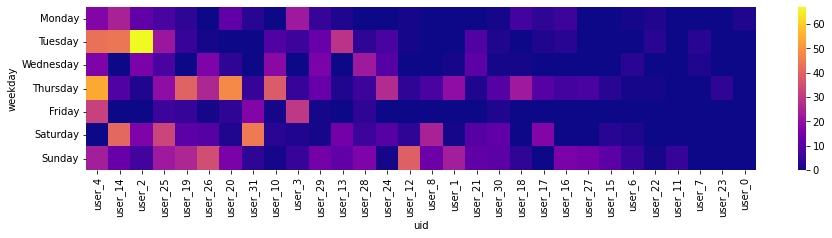

In [13]:
#Хитмап по дням недели
fig, ax = plt.subplots(figsize=(15, 3))

sns.heatmap(weekday, ax=ax, cmap='plasma')

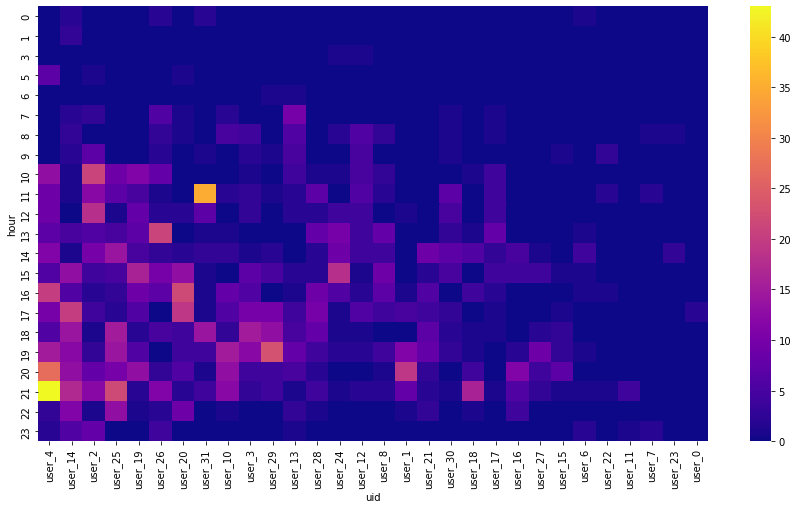

In [14]:
#Хитмап по часам
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(commit, ax=ax, cmap='plasma')

In [15]:
con.close()

<code>__«У какого пользователя больше всего коммитов во вторник?»
    __«Ответ: user_2»__
    
</code>

<code>__«У какого пользователя больше всего коммитов в четверг?»
    __«Ответ: user_4»__
    
</code>

<code>__«В какой будний день пользователи не любят делать много коммитов?»
    __«Ответ: пятница»__
    
</code>

<code>__«Какой пользователь в каком часу сделал наибольшее количество коммитов?»
    __«Ответ: user_4, 21»__
    
</code>